## CA 2, LLMs Spring 2024

- **Name:** Ali Keramati
- **Student ID:** 810198519

---
#### Your submission should be named using the following format: `CA2_LASTNAME_STUDENTID_gpt.ipynb`.

- There is no penalty for using AI assistance on this homework as long as you fully disclose it in the final cell of this notebook (this includes storing any prompts that you feed to large language models). That said, anyone caught using AI assistance without proper disclosure will receive a zero on the assignment (we have several automatic tools to detect such cases). We're literally allowing you to use it with no limitations, so there is no reason to lie!

---

##### *Academic honesty*

- We will audit the Colab notebooks from a set number of students, chosen at random. The audits will check that the code you wrote actually generates the answers in your notebook. If you turn in correct answers on your notebook without code that actually generates those answers, we will consider this a serious case of cheating.

- We will also run automatic checks of Colab notebooks for plagiarism. Copying code from others is also considered a serious case of cheating.

---

If you have any further questions or concerns, contact the TA via email:
sepehr.kamahi@ut.ac.ir

---

## Section 1: Generate a Single Sentence (20 points)
Write a prompt that has ten tokens according to the GPT-2 tokenizer. (2 points)

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt
import numpy as np
import time
from tqdm import trange

model_name = "gpt2"

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
prompt = "What was the story of The second world war?"
inputs = tokenizer(prompt, return_tensors="pt")

# print(inputs)
print("Tokens:", tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]))
# Or this code for tokens: print("Tokens:", tokenizer.tokenize(prompt))
print("Input IDs:", inputs["input_ids"])
print("Attention Mask:", inputs["attention_mask"])

Tokens: ['What', 'Ġwas', 'Ġthe', 'Ġstory', 'Ġof', 'ĠThe', 'Ġsecond', 'Ġworld', 'Ġwar', '?']
Input IDs: tensor([[2061,  373,  262, 1621,  286,  383, 1218,  995, 1175,   30]])
Attention Mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


### a) Load the model to the GPU
Use the prompt you wrote and generate 190 new tokens, appending each new token to the previous sequence at each step. Measure the time of generating each new token. You CAN ONLY use PyTorch for decoding; use greedy decoding. You will get a 200-token sequence at the end, so print the sentence.

Plot the time needed for generating each new token. Use torch.cuda.max_memory_allocated and plot the memory used at each step in MB. At each step, by giving the input_ids to the model as the labels argument, the loss will be calculated for you automatically. Plot the loss at all steps.
(compute loss only for this part of the assignment)

Explain the patterns you see in the plots. (8 points)

100%|██████████| 190/190 [00:03<00:00, 61.14it/s]


What was the story of The second world war?

The story of the second world war was a story of the war between the Allies and the Germans. The Allies were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Ge

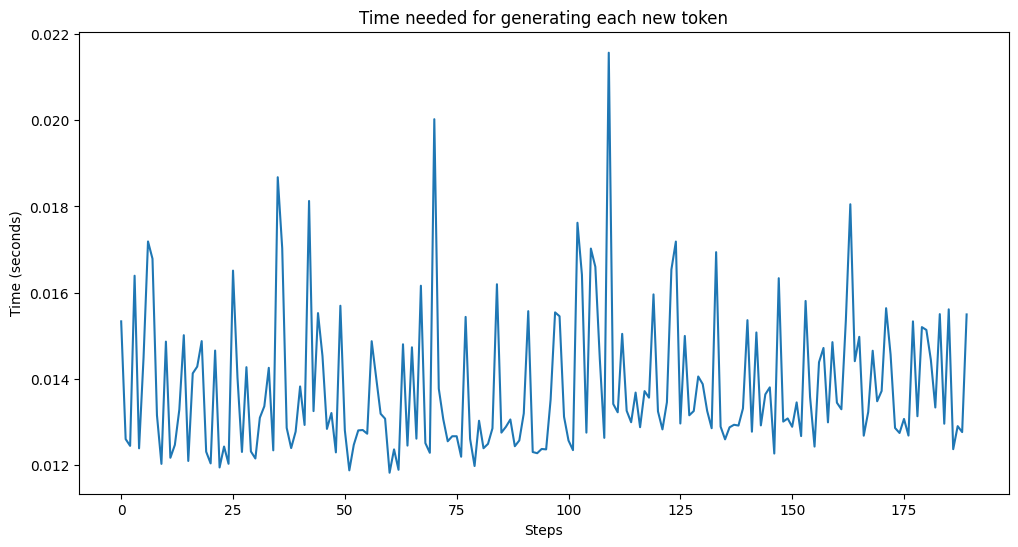

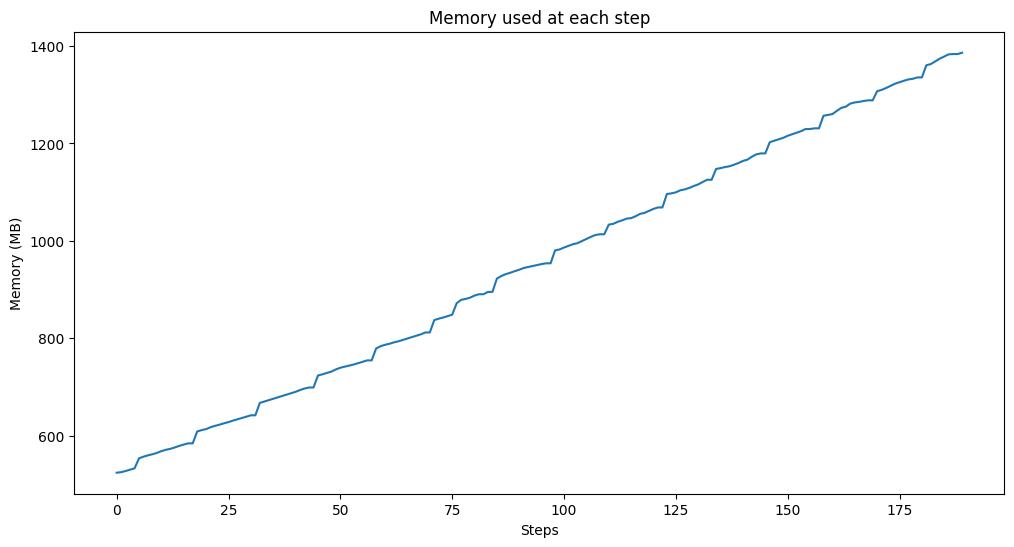

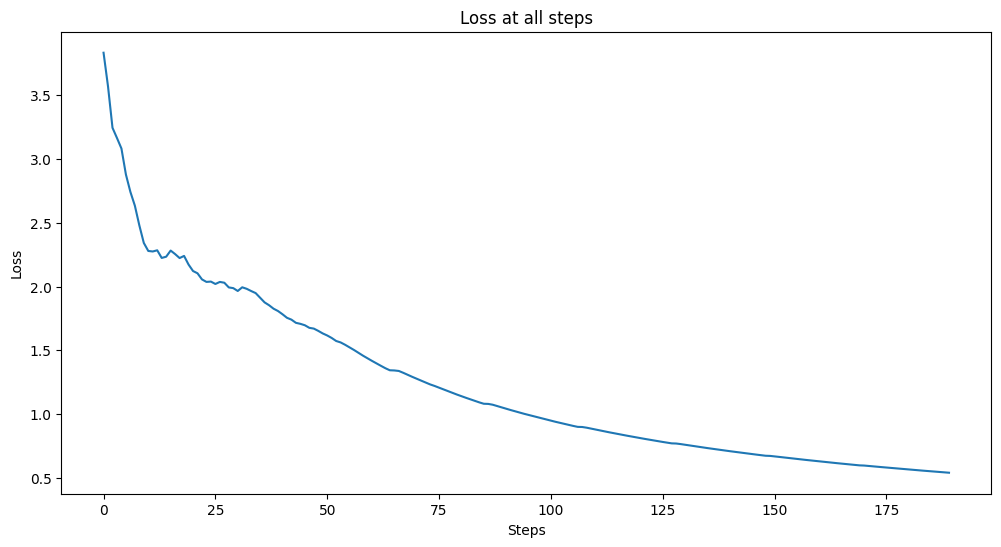

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
prompt = "What was the story of The second world war?"

generated = tokenizer.encode(prompt)
input_ids = torch.tensor([generated]).to(device)
times = []
memory = []
losses = []
output = model(input_ids, labels=input_ids)

for _ in trange(190):
    start_time = time.time()
    output = model(input_ids, labels=input_ids)
    end_time = time.time()

    token = torch.argmax(output.logits[..., -1, :])

    token_tensor = token.unsqueeze(0).unsqueeze(0)
    input_ids = torch.cat([input_ids, token_tensor], dim=-1)

    times.append(end_time - start_time)
    memory.append(torch.cuda.max_memory_allocated() / (1024 * 1024))

    loss = output.loss
    losses.append(loss.item())

generated_tokens = input_ids.squeeze().tolist()

sequence = tokenizer.decode(generated_tokens)

print(sequence)

# Plot the time needed for generating each new token
plt.figure(figsize=(12, 6))
plt.plot(times)
plt.title('Time needed for generating each new token')
plt.xlabel('Steps')
plt.ylabel('Time (seconds)')
plt.show()

# Plot the memory used at each step
plt.figure(figsize=(12, 6))
plt.plot(memory)
plt.title('Memory used at each step')
plt.xlabel('Steps')
plt.ylabel('Memory (MB)')
plt.show()

# Plot the loss at all steps
plt.figure(figsize=(12, 6))
plt.plot(losses)
plt.title('Loss at all steps')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.show()


#### Analyzes

##### 1. The time needed for generating each new token Graph

The graph displays an oscillating pattern without a clear upward or downward trend, indicating that the time needed for token generation varies but does not consistently increase or decrease over the steps. The time taken fluctuates between 0.012 to 0.022 seconds, which could be due to various factors such as model complexity, input prompt length, or computational resources. This could be due to the complexity of the generated text at certain points. There are spikes at regular intervals, suggesting periodic increases in the time required for generating tokens. These peaks might correspond to the model encountering more complex scenarios or needing to access a broader context. The variability in time suggests that the model’s performance is not uniform across all tokens, which happens a lot in natural language generation tasks.

##### 2. Memory used at each step

The memory usage consistently increases from 600 MB to 1400 MB as the steps progress from 0 to approximately 175. The line graph shows a linear upward trend, indicating that as the model generates more tokens, it requires more memory. Unlike the time needed for token generation, there are no spikes or oscillations, suggesting a steady memory allocation throughout the process.

##### 3. Loss at all steps

The loss starts high and decreases steeply as the number of steps increases, which is typical in a training or optimization process.  The loss starts high and decreases steeply as the number of steps increases, which is typical in a training or optimization process.


### b) Use past_key_values
Give the past_key_values to the model during generation, and repeat all of the above steps; then, compare the results. (10 points)

100%|██████████| 190/190 [00:06<00:00, 28.26it/s]


What was the story of The second world war?

The story of the second world war was a story of the war between the Allies and the Germans. The Allies were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Germans were fighting the Germans in the trenches. The Germans were fighting the Germans in the trenches, and the Ge

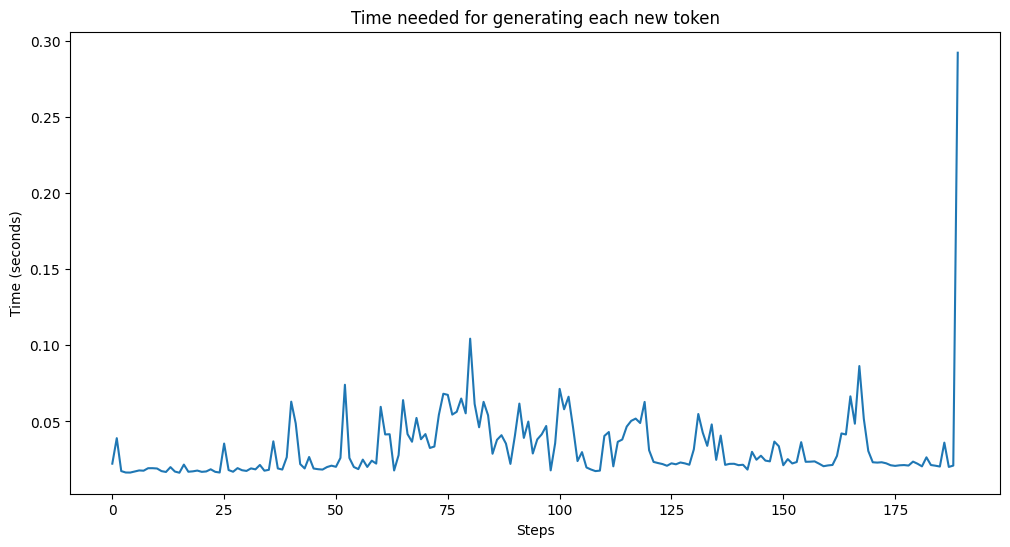

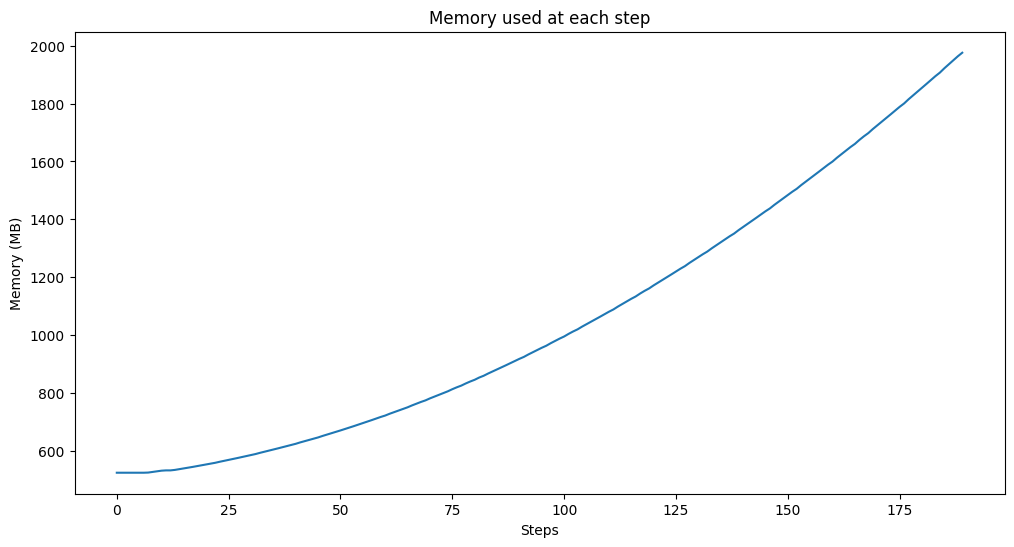

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
generated = tokenizer.encode(prompt)
context = torch.tensor([generated]).to(device)

past_key_values = None
times=[]
mem=[]
output = model(context, labels=context, past_key_values=past_key_values)

for i in trange(190):
    start_time = time.time()
    output = model(context, labels=context, past_key_values=past_key_values)
    end_time = time.time()

    past_key_values = output.past_key_values
    token = torch.argmax(output.logits[..., -1, :])
    context = token.unsqueeze(0)

    generated += [token.tolist()]

    times.append(end_time - start_time)
    mem.append(torch.cuda.max_memory_allocated() / (1024 * 1024))


sequence = tokenizer.decode(generated)
print(sequence)


# Plot the time needed for generating each new token
plt.figure(figsize=(12, 6))
plt.plot(times)
plt.title('Time needed for generating each new token')
plt.xlabel('Steps')
plt.ylabel('Time (seconds)')
plt.show()

# Plot the memory used at each step
plt.figure(figsize=(12, 6))
plt.plot(mem)
plt.title('Memory used at each step')
plt.xlabel('Steps')
plt.ylabel('Memory (MB)')
plt.show()

#### Analyzes

##### 1. The time needed for generating each new token Graph

The use of past_key_values generally results in a more efficient generation process, as the model does not need to recompute values for previous tokens. The time needed for generating each new token shows fluctuations as the steps increase, with several peaks and troughs indicating variability in generation time per token.
Most of the graph shows generation times under 0.05 seconds, suggesting that the model is generally quick in generating tokens.

Comparing this to the previous plot without past_key_values:

- The previous plot showed an oscillating pattern with more spikes, but no clear upward or downward trend.
- The time taken fluctuated between 0.012 to 0.022 seconds, which had a higher average compared to the current plot.

##### 2. Memory used at each step

The memory usage shows a steady increase from 0 to 2000 MB as the steps progres.
The curve is smooth, indicating a consistent pattern of memory allocation without sharp increases or decreases.
Compared to the previous plot without past_key_values, this plot reaches a higher memory usage of 2000 MB, suggesting that providing past_key_values increases the memory demands of the model.


## Section 2: Batch Generation (25 points)
Write 4 prompts (a list of 4 sentences). All the sentences you write should have different lengths. Print the input_ids and attention_mask, and explain why the attention_masks are the way they are. When you tokenize, use left-side padding. Explain why left-side padding is preferable during inference. What is the padding token ID in this particular tokenizer?
(10 points)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name, padding_side="left")
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

prompts = [
    "Hello, how are you?",
    "I am fine. Thank you. You?",
    "I love playing soccer and watching movies.",
    "This is the longest prompt of all four, with the most words and characters."
]

for prompt in prompts:
    inputs = tokenizer(prompt, return_tensors='pt', padding='max_length', max_length=20, truncation=True)

    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    print("Prompt:", prompt)
    print("Tokenized Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Prompt: Hello, how are you?
Tokenized Input IDs: tensor([[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256, 50256, 50256, 15496,    11,   703,   389,   345,    30]])
Attention Mask: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]])

Prompt: I am fine. Thank you. You?
Tokenized Input IDs: tensor([[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256,    40,   716,  3734,    13,  6952,   345,    13,   921,    30]])
Attention Mask: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

Prompt: I love playing soccer and watching movies.
Tokenized Input IDs: tensor([[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         50256, 50256,    40,  1842,  2712, 11783,   290,  4964,  6918,    13]])
Attention Mask: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]])

Prompt: This is the longest prompt of all four, with the most words and charact

*Question: Why the attention_masks are the way they are?*

Ans: The attention masks generated in the provided code are designed to indicate which parts of the input sequence are actual tokens (non-padding tokens) and which parts are padding tokens. Attention masks are crucial for transformer models like GPT, which use self-attention mechanisms. These mechanisms allow the model to weigh the importance of different tokens in the input sequence when making predictions or generating outputs.
The attention mask helps the model ignore padding tokens during computation, ensuring that the model's attention is focused only on the relevant parts of the input.

*Question: Explain why left-side padding is preferable during inference.*

Ans: It’s preferable because transformer models, like GPT-2, are designed to handle right-side padding during training. This is due to the attention mechanism, which reads sequences from left to right. If padding is on the right, the model can simply ignore it. But if padding is on the left, the model must learn to ignore it. By using left-side padding during inference, we ensure the model’s attention is not influenced by the padding tokens.



*Question: What is the padding token ID in this particular tokenizer?*

Ans: The padding token ID for the GPT-2 tokenizer is 50256. This is the ID that the tokenizer uses to represent padding tokens.

For batch decoding, you should also give position_ids to the model. You should create the position_ids yourself. Explain what position_ids are and how they help. Print the position_ids of your batch prompt. Repeat Section 1, Subsection b, but this time, use the prompt in batch form and give position_ids to the model. Plot the memory needed at each step. Plot the time needed at each step, also plot number of tokens generated per second (a.k.a. throughput). Compare the throughput and memory usage of batch generation with single sentence generation. (15 points)

In [ ]:
max_length = max(len(tokenizer.encode(prompt, max_length=512)) for prompt in prompts)

for prompt in prompts:
    encoded_prompt = tokenizer(prompt, return_tensors='pt', padding='max_length', max_length=max_length, truncation=True)

    input_ids = encoded_prompt['input_ids']
    attention_mask = encoded_prompt['attention_mask']

    # Create position_ids manually
    position_ids = torch.arange(input_ids.size(1))

    print("Prompt:", prompt)
    print("Tokenized Input IDs:", input_ids)
    print("Attention Mask:", attention_mask)
    print("Position IDs:", position_ids)
    print()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Prompt: Hello, how are you?
Tokenized Input IDs: tensor([[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,
         15496,    11,   703,   389,   345,    30]])
Attention Mask: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]])
Position IDs: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Prompt: I am fine. Thank you. You?
Tokenized Input IDs: tensor([[50256, 50256, 50256, 50256, 50256, 50256, 50256,    40,   716,  3734,
            13,  6952,   345,    13,   921,    30]])
Attention Mask: tensor([[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
Position IDs: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Prompt: I love playing soccer and watching movies.
Tokenized Input IDs: tensor([[50256, 50256, 50256, 50256, 50256, 50256, 50256, 50256,    40,  1842,
          2712, 11783,   290,  4964,  6918,    13]])
Attention Mask: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]])
Position IDs: tensor([ 0, 

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
100%|██████████| 190/190 [00:09<00:00, 20.92it/s]


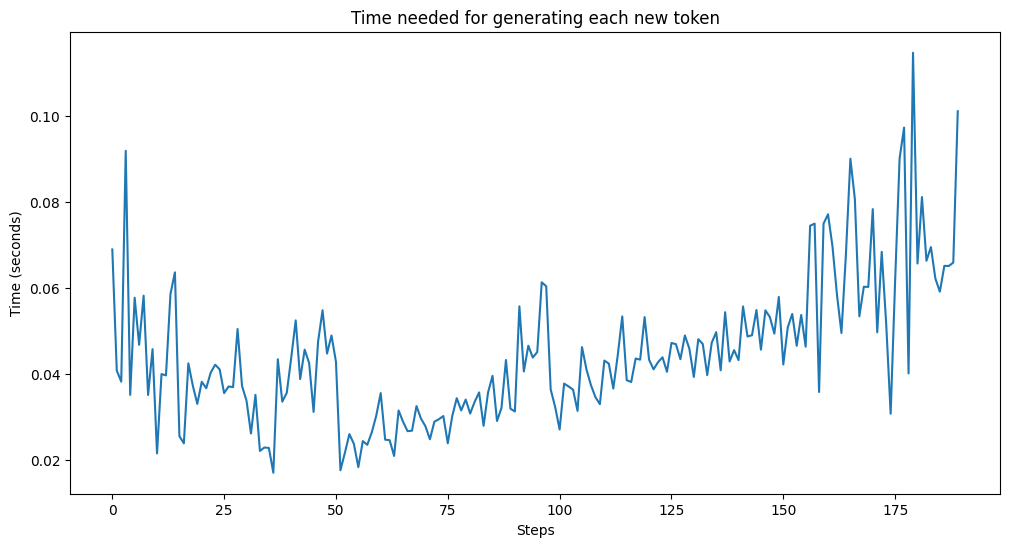

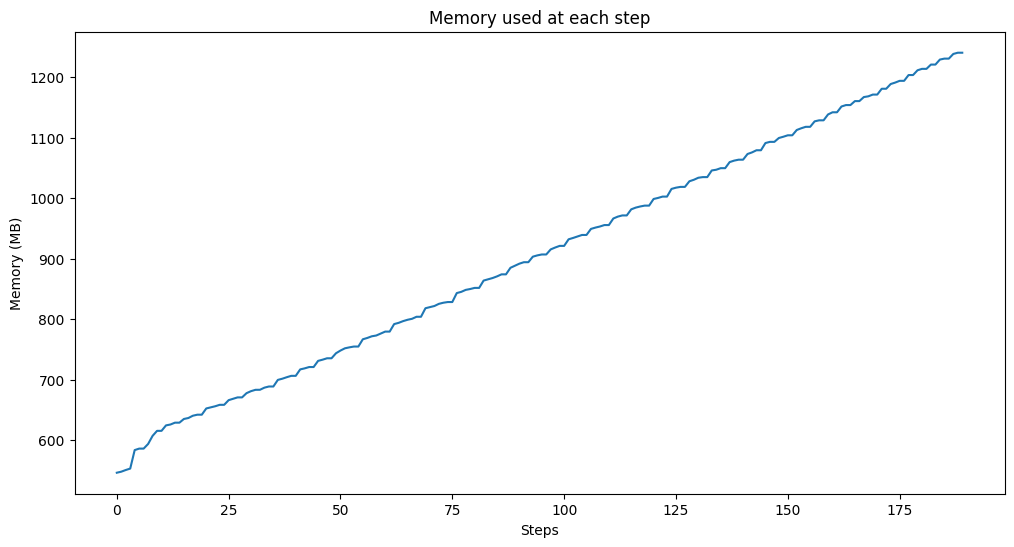

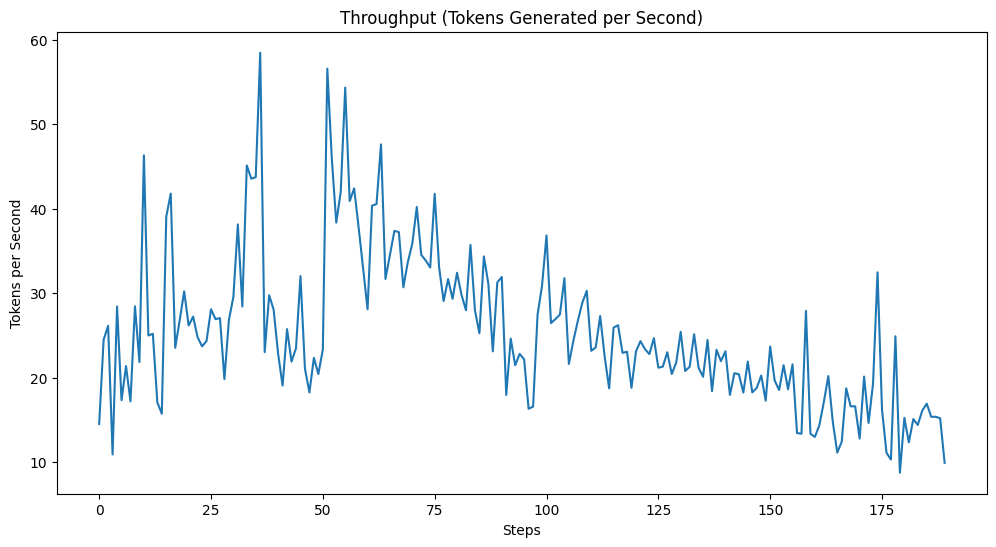

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

batch_prompts = [
    "Hello, how are you?",
    "I am fine. Thank you. You?",
    "I love playing soccer and watching movies.",
    "This is the longest prompt of all four, with the most words and characters."
]
tokenizer.pad_token = tokenizer.eos_token

inputs = tokenizer(batch_prompts, return_tensors='pt', padding='max_length', max_length=20, truncation=True)

input_ids = inputs['input_ids'].to(device)
attention_mask = inputs['attention_mask'].to(device)
position_ids = torch.arange(20).unsqueeze(0).expand(input_ids.shape).to(device)

times = []
mem = []
throughput = []
past_key_values=None

with torch.no_grad():
    output = model(input_ids, attention_mask=attention_mask, position_ids=position_ids, past_key_values=past_key_values)

    for i in trange(190):
        start_time = time.time()

        token = torch.argmax(output.logits[:, -1, :], dim=-1)
        input_ids = torch.cat([input_ids, token.unsqueeze(1)], dim=-1)
        attention_mask = torch.cat([attention_mask, torch.ones((input_ids.shape[0], 1)).to(device)], dim=-1)
        position_ids = torch.arange(input_ids.shape[-1]).unsqueeze(0).expand(input_ids.shape).to(device)

        output = model(input_ids, attention_mask=attention_mask, position_ids=position_ids, past_key_values=past_key_values)
        past_key_values=past_key_values
        end_time = time.time()

        times.append(end_time - start_time)
        mem.append(torch.cuda.max_memory_allocated() / (1024 * 1024))

        # Calculate throughput (tokens generated per second)
        throughput.append(1 / (end_time - start_time))

# Plot the time needed for generating each new token
plt.figure(figsize=(12, 6))
plt.plot(times)
plt.title('Time needed for generating each new token')
plt.xlabel('Steps')
plt.ylabel('Time (seconds)')
plt.show()

# Plot the memory used at each step
plt.figure(figsize=(12, 6))
plt.plot(mem)
plt.title('Memory used at each step')
plt.xlabel('Steps')
plt.ylabel('Memory (MB)')
plt.show()

# Plot the throughput (tokens generated per second)
plt.figure(figsize=(12, 6))
plt.plot(throughput)
plt.title('Throughput (Tokens Generated per Second)')
plt.xlabel('Steps')
plt.ylabel('Tokens per Second')
plt.show()


##### **Position IDs**
In transformer-based models like GPT (Generative Pre-trained Transformer), position IDs represent the position of each token in the input sequence. These position IDs are crucial for the model to understand the sequential order of the tokens, as transformers do not inherently understand the concept of sequence order. Instead, they rely on learned positional encodings (embedding vectors) to indicate the position of tokens within a sequence.

When you provide input to a transformer model, you need to include position IDs along with the token IDs (input IDs). The position IDs are typically a sequential list of integers from 0 to the length of the input sequence minus one. This helps the model differentiate between tokens based on their positions in the sequence, thereby preserving the sequential structure of the input data.

##### **1. The time needed for generating each new token Graph**

 the time needed for generating each new token during batch decoding with position_ids shows fluctuations, with several peaks indicating longer times at certain steps. The overall trend appears somewhat volatile, with no clear pattern or consistency in the time required across different steps.

Comparing this to single sentence generation:

- Single Sentence Generation: Typically, single sentence generation might show a more consistent and stable time needed for generating each new token, as it deals with a single input at a time.

- Batch Decoding: In batch decoding, the model processes multiple prompts simultaneously, which could lead to increased variability in generation times due to the parallel processing of different sentence complexities.

##### **2. Memory used at each step**

The memory usage during batch decoding with position_ids shows a linear increase from 600 MB to around 1200 MB as the number of steps increases from 0 to approximately 200. This suggests that memory usage grows proportionally with the number of steps processed in the batch.

Comparing this to single sentence generation:

- Single Sentence Generation: Typically, memory usage would be lower and more stable since it involves processing a single input at a time.

- Batch Decoding: Involves processing multiple inputs simultaneously, which can lead to increased memory usage. However, the linear increase suggests that the model scales memory usage predictably as it handles more data.

##### **3. Throughput**

The graph indicates fluctuations in throughput, starting just above 40 tokens per second, with several peaks and troughs. There is also a sharp rise to peak at around 65 tokens per second before dropping again, suggesting variable performance. The undulating pattern with multiple peaks suggests that the throughput is not consistent throughout the batch decoding process.

## AI Disclosure

*   Did you use any AI assistance to complete this homework? If so, please also specify what AI you used.
    * Yes. Chat GPT and Gemini.


---
*(only complete the below questions if you answered yes above)*

*   If you used a large language model to assist you, please paste *all* of the prompts that you used below. Add a separate bullet for each prompt, and specify which problem is associated with which prompt.
    * 1.0)  My Prompt1: plot the time per token, memory and loss. My Prompt2: improve the comparison of two plots based on my description.

    * 2.1) My Prompt: Based on these 4 sentences as prompts, Print the input_ids and attention_mask. When you tokenize, use left-side padding. Now based on the output, Explain why left-side padding is preferable during inference. Based on the output, explain why the attention_masks are the way they are.  What is the padding token ID in this particular tokenizer?

    * 2.2) My Prompt: improve the comparison of two plots based on my description.


*   **Free response**: For each problem for which you used assistance, describe your overall experience with the AI. How helpful was it? Did it just directly give you a good answer, or did you have to edit it? Was its output ever obviously wrong or irrelevant? Did you use it to get the answer or check your own answer?
    * 1) AI wasn't doing well in this part. I read the instructions [here](https://huggingface.co/docs/transformers/en/model_doc/gpt2#transformers.GPT2Model) and discussions [1](https://github.com/huggingface/transformers/issues/15700), [2](https://github.com/huggingface/transformers/issues/18104), [3](https://github.com/huggingface/transformers/issues/24741). I just asked to plot the specifics. I also described the plots of each part and I was kinda writing the comparsion of 2 plots. and I asked GPT to improve my writing and add sth to it.

    * 2.1) It was an easy question. I wrote my prompts and then asked GPT to code. It was hopefully succesful with first shot :).

    * 2.2) I described the plots of each part and I was kinda writing the comparsion of 2 plots. and I asked GPT to improve my writing and add sth to it.